Phần 1: Thống kê dữ liệu

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
df = pd.read_csv('/content/processed_dulieuxettuyendaihoc.csv')

1. Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần

In [11]:
dh1_sorted = df['DH1'].sort_values()
print("1. Dữ liệu điểm DH1 theo thứ tự tăng dần:")
print(dh1_sorted.head())
print("...")
print(dh1_sorted.tail())

1. Dữ liệu điểm DH1 theo thứ tự tăng dần:
53    1.00
43    1.25
5     1.50
72    1.50
83    1.75
Name: DH1, dtype: float64
...
6     6.50
11    6.75
23    6.75
24    7.00
97    7.00
Name: DH1, dtype: float64


2. Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính

In [3]:
dh2_sorted_by_gt = df.sort_values(by=['GT', 'DH2'])
print("\n2. Dữ liệu điểm DH2 tăng dần theo nhóm giới tính:")
print(dh2_sorted_by_gt[['GT', 'DH2']].head())
print("...")
print(dh2_sorted_by_gt[['GT', 'DH2']].tail())


2. Dữ liệu điểm DH2 tăng dần theo nhóm giới tính:
   GT   DH2
95  F  1.50
25  F  2.00
24  F  2.25
46  F  2.25
13  F  2.75
...
   GT   DH2
68  M  6.00
11  M  6.50
47  M  6.50
2   M  6.75
97  M  8.00


3. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,
Q2 và Q3 của DH1 theo KT

In [7]:
def all_stats(series):
    return pd.Series({
        'count': series.count(),
        'sum': series.sum(),
        'mean': series.mean(),
        'median': series.median(),
        'min': series.min(),
        'max': series.max(),
        'std': series.std(),
        'Q1': series.quantile(0.25),
        'Q2': series.quantile(0.50),
        'Q3': series.quantile(0.75)
    })

# Create the pivot-table
dh1_stats_kt = df.groupby('KT')['DH1'].apply(all_stats)

print("\nPivot-table thống kê DH1 theo KT:")
print(dh1_stats_kt)


Pivot-table thống kê DH1 theo KT:
KT        
A   count      49.000000
    sum       163.500000
    mean        3.336735
    median      3.250000
    min         1.000000
    max         6.500000
    std         1.274296
    Q1          2.250000
    Q2          3.250000
    Q3          4.250000
A1  count       6.000000
    sum        17.500000
    mean        2.916667
    median      3.000000
    min         2.000000
    max         4.250000
    std         0.861201
    Q1          2.187500
    Q2          3.000000
    Q3          3.250000
B   count       9.000000
    sum        29.500000
    mean        3.277778
    median      3.500000
    min         1.750000
    max         4.500000
    std         0.823905
    Q1          3.250000
    Q2          3.500000
    Q3          3.750000
C   count      14.000000
    sum        79.250000
    mean        5.660714
    median      5.250000
    min         4.750000
    max         7.000000
    std         0.812209
    Q1          5.062500
    

4. Hãy tạo pivot-table để thống kê các giá trị count, sum, mean, median, min, max, std, Q1,
Q2 và Q3 của DH1 theo KT và KV

In [9]:
import pandas as pd

# Đọc dữ liệu đã xử lý
try:
    df = pd.read_csv('processed_dulieuxettuyendaihoc.csv')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file processed_dulieuxettuyendaihoc.csv. Vui lòng đảm bảo file tồn tại trong thư mục làm việc.")
    exit()

# Định nghĩa hàm tính tất cả các thống kê
def all_stats(series):
    return pd.Series({
        'count': series.count(),
        'sum': series.sum(),
        'mean': series.mean(),
        'median': series.median(),
        'min': series.min(),
        'max': series.max(),
        'std': series.std(),
        'Q1': series.quantile(0.25),
        'Q2': series.quantile(0.50),
        'Q3': series.quantile(0.75)
    })

# Create the pivot-table
dh1_stats_kt_kv = df.groupby(['KT', 'KV'])['DH1'].apply(all_stats)

print("\nPivot-table thống kê DH1 theo KT và KV:")
print(dh1_stats_kt_kv)


Pivot-table thống kê DH1 theo KT và KV:
KT  KV         
A   1    count     29.000000
         sum       93.750000
         mean       3.232759
         median     3.250000
         min        1.000000
                     ...    
D1  2NT  max        3.750000
         std             NaN
         Q1         3.750000
         Q2         3.750000
         Q3         3.750000
Name: DH1, Length: 130, dtype: float64


Phần 2: Trình bày dữ liệu

1. Hãy trình bày dữ liệu biến: GT
Gợi ý
- Lập bảng tần số và tần suất
- Vẽ biểu đồ tần số (cột), biểu đồ tần suất (tròn).


--- Trình bày dữ liệu biến GT ---

Bảng tần số biến GT:
GT
M    52
F    48
Name: count, dtype: int64

Bảng tần suất biến GT:
GT
M    52.0
F    48.0
Name: proportion, dtype: float64


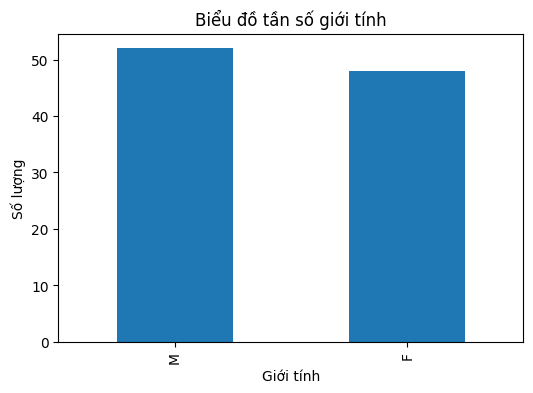

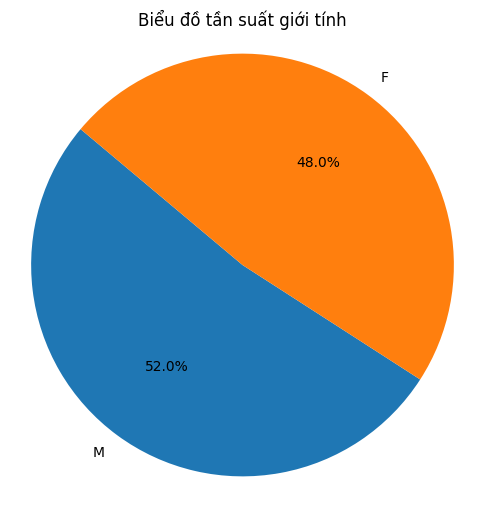

In [12]:
print("\n--- Trình bày dữ liệu biến GT ---")
gt_freq = df['GT'].value_counts()
gt_percentage = df['GT'].value_counts(normalize=True) * 100
print("\nBảng tần số biến GT:")
print(gt_freq)
print("\nBảng tần suất biến GT:")
print(gt_percentage)
plt.figure(figsize=(6, 4))
gt_freq.plot(kind='bar')
plt.title('Biểu đồ tần số giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng')
plt.show()
plt.figure(figsize=(6, 6))
plt.pie(gt_freq, labels=gt_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tần suất giới tính')
plt.axis('equal')
plt.show()

2. Hãy trình bày dữ liệu lần lượt các biến: US_TBM1, US_TBM2 và US_TBM3


--- Trình bày dữ liệu các biến US_TBM1, US_TBM2, US_TBM3 ---

Thống kê mô tả cho biến US_TBM1:
count    100.000000
mean       2.025941
std        0.968324
min        0.000000
25%        1.215347
50%        2.138614
75%        2.742574
max        4.000000
Name: US_TBM1, dtype: float64


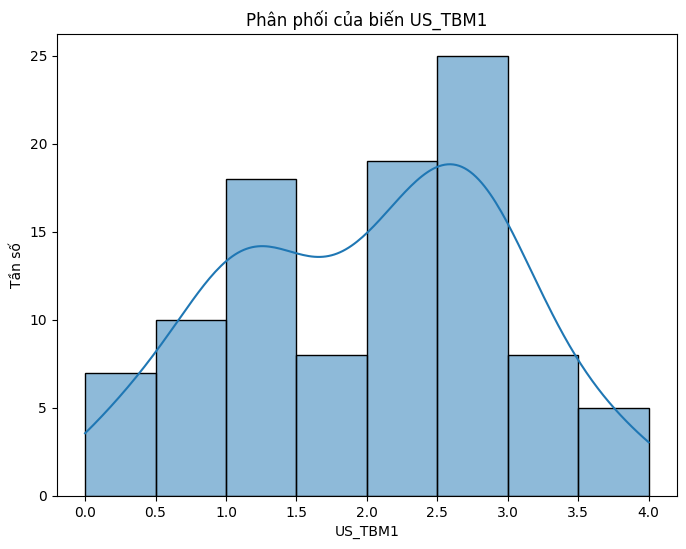

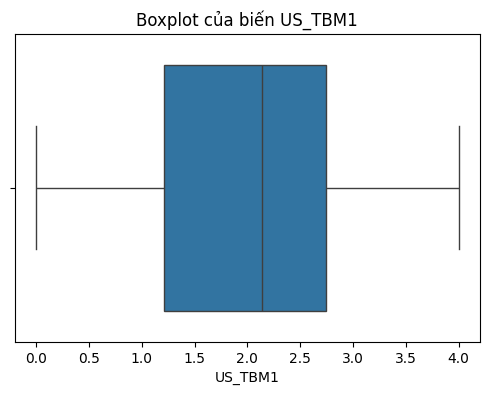


Thống kê mô tả cho biến US_TBM2:
count    100.000000
mean       1.921359
std        0.916640
min        0.000000
25%        1.104369
50%        1.990291
75%        2.730583
max        4.000000
Name: US_TBM2, dtype: float64


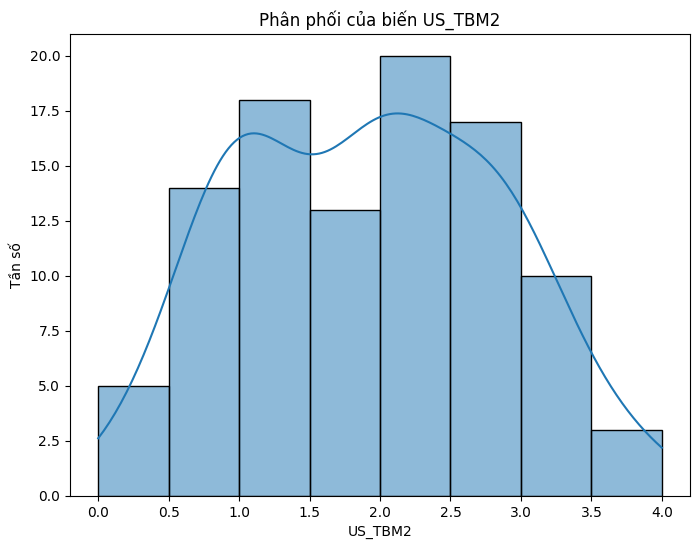

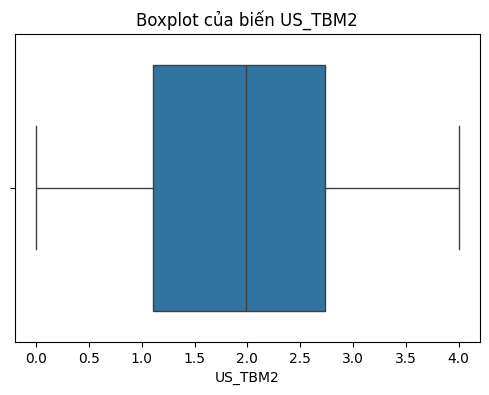


Thống kê mô tả cho biến US_TBM3:
count    100.000000
mean       2.159314
std        0.856600
min        0.000000
25%        1.591429
50%        2.257143
75%        2.737143
max        4.000000
Name: US_TBM3, dtype: float64


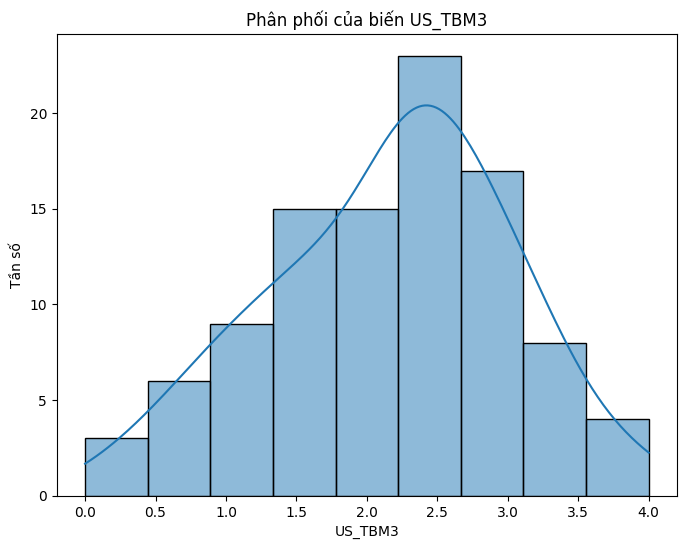

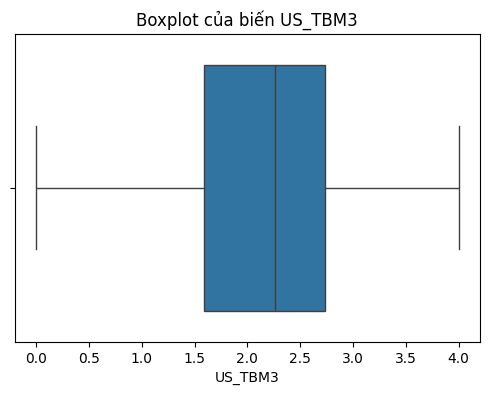

In [13]:
us_tbm_cols = ['US_TBM1', 'US_TBM2', 'US_TBM3']
print("\n--- Trình bày dữ liệu các biến US_TBM1, US_TBM2, US_TBM3 ---")
for col in us_tbm_cols:
    print(f"\nThống kê mô tả cho biến {col}:")
    print(df[col].describe())
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Phân phối của biến {col}')
    plt.xlabel(col)
    plt.ylabel('Tần số')
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot của biến {col}')
    plt.xlabel(col)
    plt.show()


3. Hãy trình bày dữ liệu biến DT với các học sinh là nam


--- Trình bày dữ liệu biến DT với các học sinh là nam ---

Bảng tần số dân tộc của học sinh nam:
DT
0.0    50
1.0     1
6.0     1
Name: count, dtype: int64

Bảng tần suất dân tộc của học sinh nam:
DT
0.0    96.153846
1.0     1.923077
6.0     1.923077
Name: proportion, dtype: float64


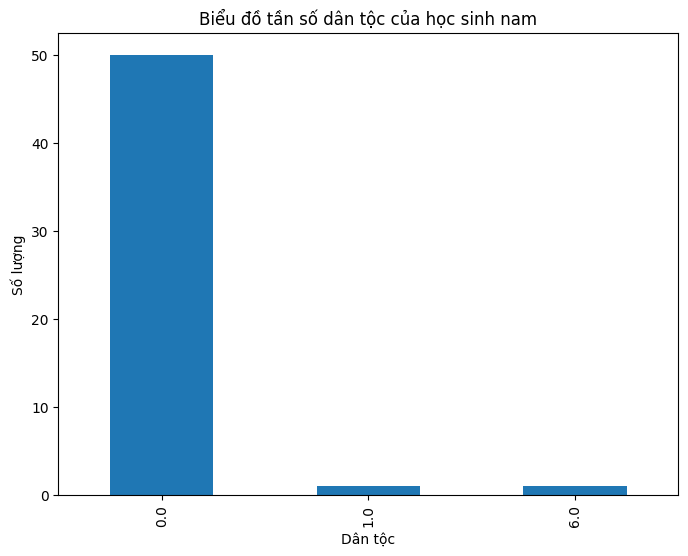

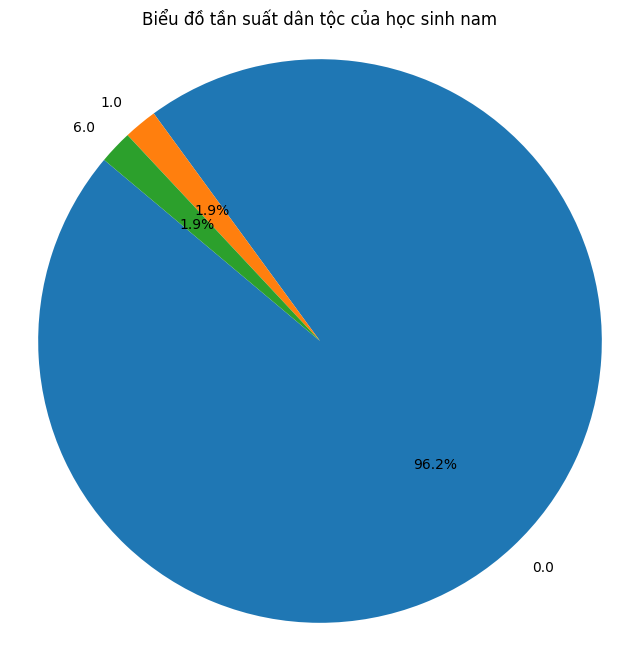

In [14]:
print("\n--- Trình bày dữ liệu biến DT với các học sinh là nam ---")
df_nam = df[df['GT'] == 'M']
dt_nam_freq = df_nam['DT'].value_counts()
dt_nam_percentage = df_nam['DT'].value_counts(normalize=True) * 100
print("\nBảng tần số dân tộc của học sinh nam:")
print(dt_nam_freq)
print("\nBảng tần suất dân tộc của học sinh nam:")
print(dt_nam_percentage)
plt.figure(figsize=(8, 6))
dt_nam_freq.plot(kind='bar')
plt.title('Biểu đồ tần số dân tộc của học sinh nam')
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng')
plt.show()
plt.figure(figsize=(8, 8))
plt.pie(dt_nam_freq, labels=dt_nam_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tần suất dân tộc của học sinh nam')
plt.axis('equal')
plt.show()

4. Hãy trình bày dữ liệu biến KV với các học sinh là nam thuộc dân tộc Kinh, có điểm thỏa
mãn điều kiện (DH1 >= 5.0 và DH2 >= 4.0 và DH3 >= 4.0)



--- Trình bày dữ liệu biến KV với học sinh nam dân tộc Kinh có điểm DH1>=5, DH2>=4, DH3>=4 ---

Bảng tần số khu vực của học sinh nam dân tộc Kinh đạt điều kiện:
KV
1      2
2      2
2NT    2
Name: count, dtype: int64

Bảng tần suất khu vực của học sinh nam dân tộc Kinh đạt điều kiện:
KV
1      33.333333
2      33.333333
2NT    33.333333
Name: proportion, dtype: float64


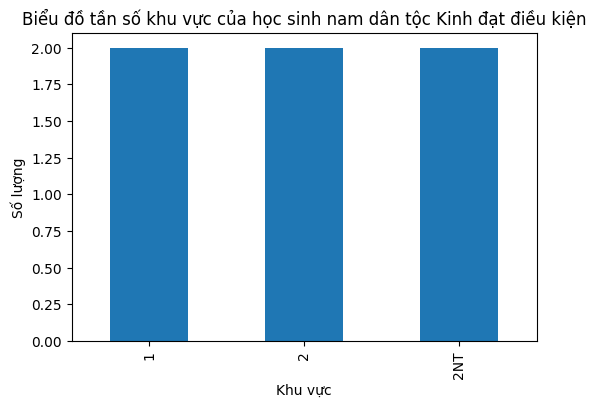

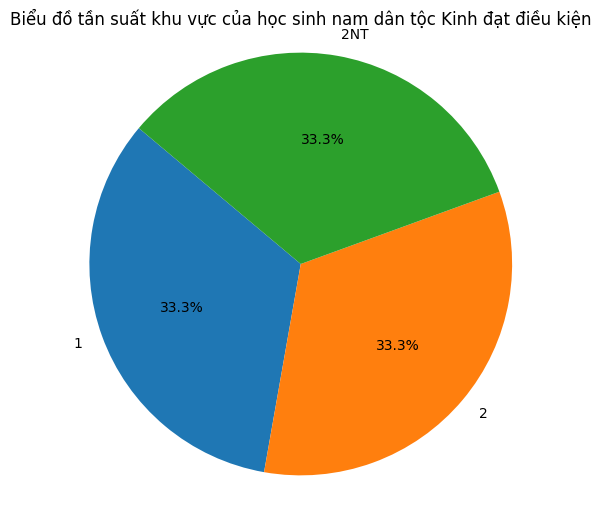

In [15]:
print("\n--- Trình bày dữ liệu biến KV với học sinh nam dân tộc Kinh có điểm DH1>=5, DH2>=4, DH3>=4 ---")
df_filtered = df[(df['GT'] == 'M') & (df['DT'] == 0) & (df['DH1'] >= 5.0) & (df['DH2'] >= 4.0) & (df['DH3'] >= 4.0)]
kv_filtered_freq = df_filtered['KV'].value_counts()
kv_filtered_percentage = df_filtered['KV'].value_counts(normalize=True) * 100
print("\nBảng tần số khu vực của học sinh nam dân tộc Kinh đạt điều kiện:")
print(kv_filtered_freq)
print("\nBảng tần suất khu vực của học sinh nam dân tộc Kinh đạt điều kiện:")
print(kv_filtered_percentage)
plt.figure(figsize=(6, 4))
kv_filtered_freq.plot(kind='bar')
plt.title('Biểu đồ tần số khu vực của học sinh nam dân tộc Kinh đạt điều kiện')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng')
plt.show()
plt.figure(figsize=(6, 6))
plt.pie(kv_filtered_freq, labels=kv_filtered_freq.index, autopct='%1.1f%%', startangle=140)
plt.title('Biểu đồ tần suất khu vực của học sinh nam dân tộc Kinh đạt điều kiện')
plt.axis('equal')
plt.show()

5. Hãy trình bày dữ liệu lần lượt các biến DH1, DH2, DH3 lớn hơn bằng 5.0 và thuộc khu
vực 2NT


--- Trình bày dữ liệu các biến DH1, DH2, DH3 với DH >= 5.0 và KV = '2NT' ---

Thống kê mô tả cho biến DH1 (KV=2NT, DH>=5.0):
count    1.00
mean     6.75
std       NaN
min      6.75
25%      6.75
50%      6.75
75%      6.75
max      6.75
Name: DH1, dtype: float64


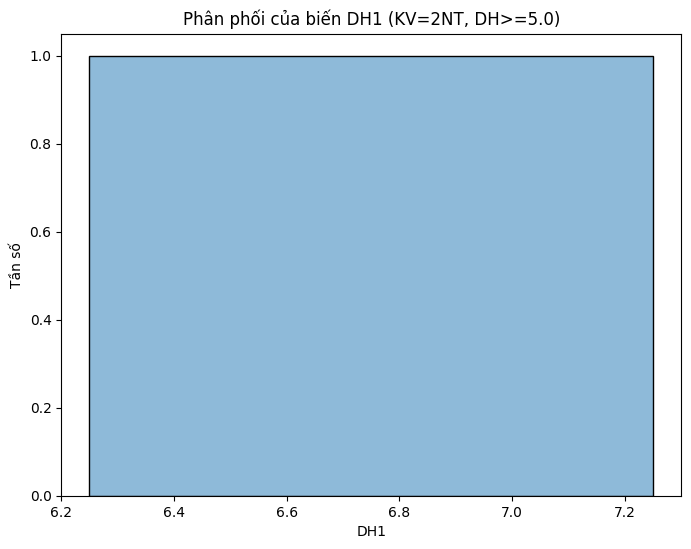

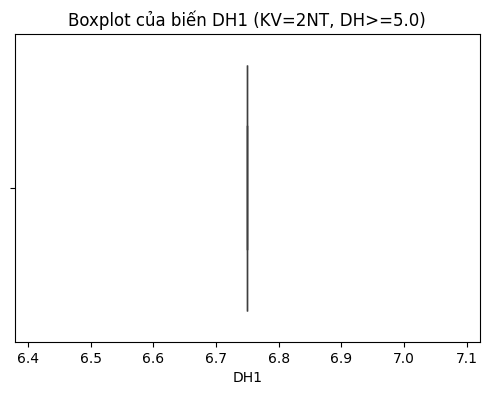


Thống kê mô tả cho biến DH2 (KV=2NT, DH>=5.0):
count    1.00
mean     5.25
std       NaN
min      5.25
25%      5.25
50%      5.25
75%      5.25
max      5.25
Name: DH2, dtype: float64


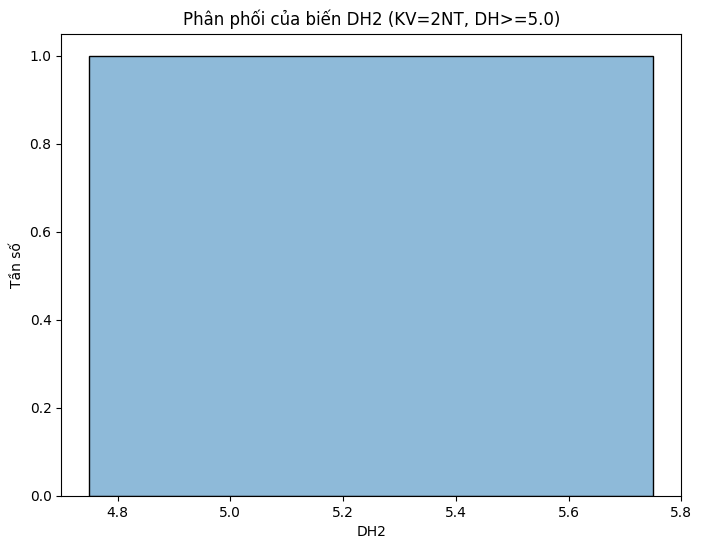

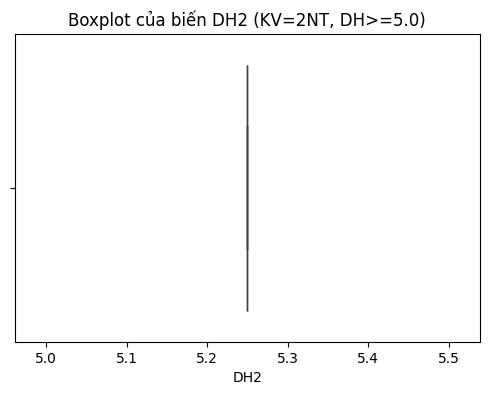


Thống kê mô tả cho biến DH3 (KV=2NT, DH>=5.0):
count    1.0
mean     5.0
std      NaN
min      5.0
25%      5.0
50%      5.0
75%      5.0
max      5.0
Name: DH3, dtype: float64


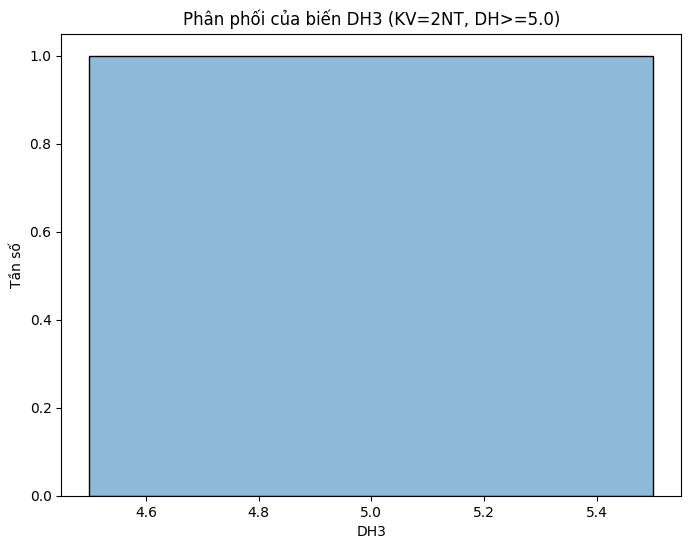

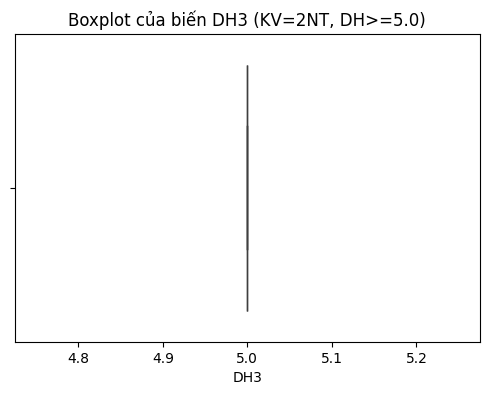

In [16]:
print("\n--- Trình bày dữ liệu các biến DH1, DH2, DH3 với DH >= 5.0 và KV = '2NT' ---")
df_kv_2nt_dh_ge_5 = df[((df['DH1'] >= 5.0) & (df['DH2'] >= 5.0) & (df['DH3'] >= 5.0)) & (df['KV'] == '2NT')]
dh_cols = ['DH1', 'DH2', 'DH3']
for col in dh_cols:
    print(f"\nThống kê mô tả cho biến {col} (KV=2NT, DH>=5.0):")
    print(df_kv_2nt_dh_ge_5[col].describe())
    plt.figure(figsize=(8, 6))
    sns.histplot(df_kv_2nt_dh_ge_5[col], kde=True)
    plt.title(f'Phân phối của biến {col} (KV=2NT, DH>=5.0)')
    plt.xlabel(col)
    plt.ylabel('Tần số')
    plt.show()
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_kv_2nt_dh_ge_5[col])
    plt.title(f'Boxplot của biến {col} (KV=2NT, DH>=5.0)')
    plt.xlabel(col)
    plt.show()

Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại

1. Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 dạng unstacked
Gợi ý
- Lọc dữ liệu giới tính là nữ
- Oy: Chiều cao biểu đồ cột thể hiển số lượng học sinh theo xếp loại
- Màu sắc thể hiện giá trị xếp loại: [Y, TB, K, G, XS]
- Ox: thể hiện nhóm XL1, XL2 và XL3



--- Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 ---


<ipython-input-17-46aeea0c43e7>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  xl_nu = df_nu[['XL1', 'XL2', 'XL3']].apply(pd.value_counts).fillna(0).T
<ipython-input-17-46aeea0c43e7>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  xl_nu = df_nu[['XL1', 'XL2', 'XL3']].apply(pd.value_counts).fillna(0).T
<ipython-input-17-46aeea0c43e7>:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  xl_nu = df_nu[['XL1', 'XL2', 'XL3']].apply(pd.value_counts).fillna(0).T


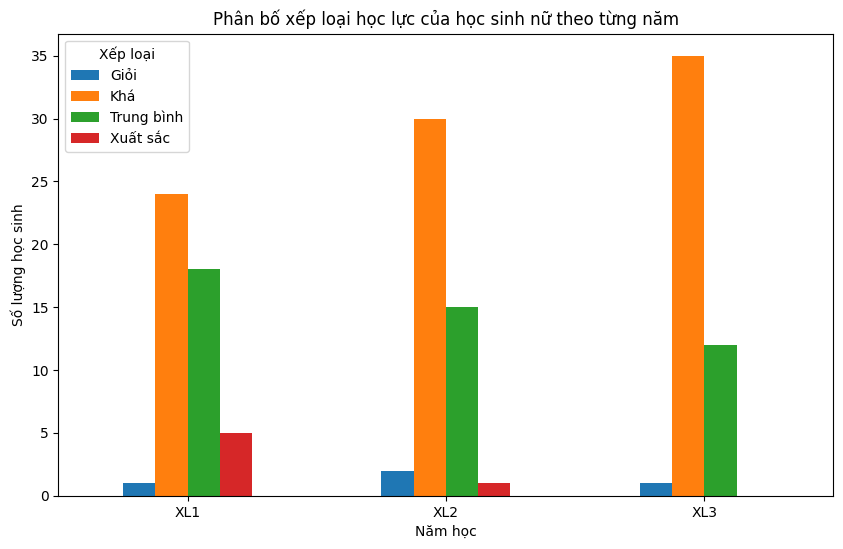

In [17]:
print("\n--- Trực quan dữ liệu học sinh nữ trên các nhóm XL1, XL2, XL3 ---")
df_nu = df[df['GT'] == 'F']
xl_nu = df_nu[['XL1', 'XL2', 'XL3']].apply(pd.value_counts).fillna(0).T
xl_nu.plot(kind='bar', figsize=(10, 6))
plt.title('Phân bố xếp loại học lực của học sinh nữ theo từng năm')
plt.xlabel('Năm học')
plt.ylabel('Số lượng học sinh')
plt.xticks(rotation=0)
plt.legend(title='Xếp loại', labels=['Giỏi', 'Khá', 'Trung bình', 'Xuất sắc', 'Yếu'])
plt.show()

2. Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2


--- Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2 ---


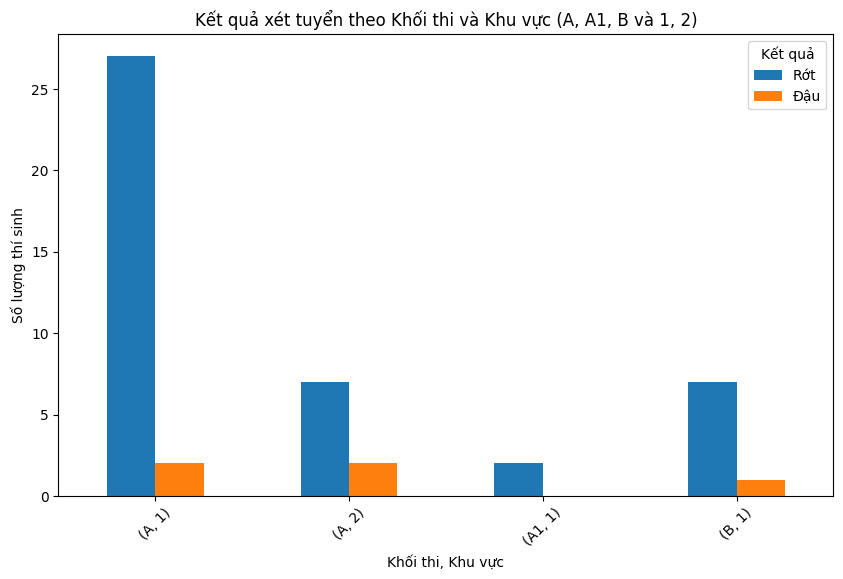

In [18]:
print("\n--- Trực quan dữ liệu KQXT trên nhóm học sinh có khối thi A, A1, B thuộc khu vực 1, 2 ---")
df_kqxt_filtered = df[df['KT'].isin(['A', 'A1', 'B']) & df['KV'].isin(['1', '2'])]
kqxt_by_kt_kv = df_kqxt_filtered.groupby(['KT', 'KV', 'KQXT']).size().unstack(fill_value=0)
kqxt_by_kt_kv.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Kết quả xét tuyển theo Khối thi và Khu vực (A, A1, B và 1, 2)')
plt.xlabel('Khối thi, Khu vực')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=45)
plt.legend(title='Kết quả', labels=['Rớt', 'Đậu'])
plt.show()


3. Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi


--- Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi ---


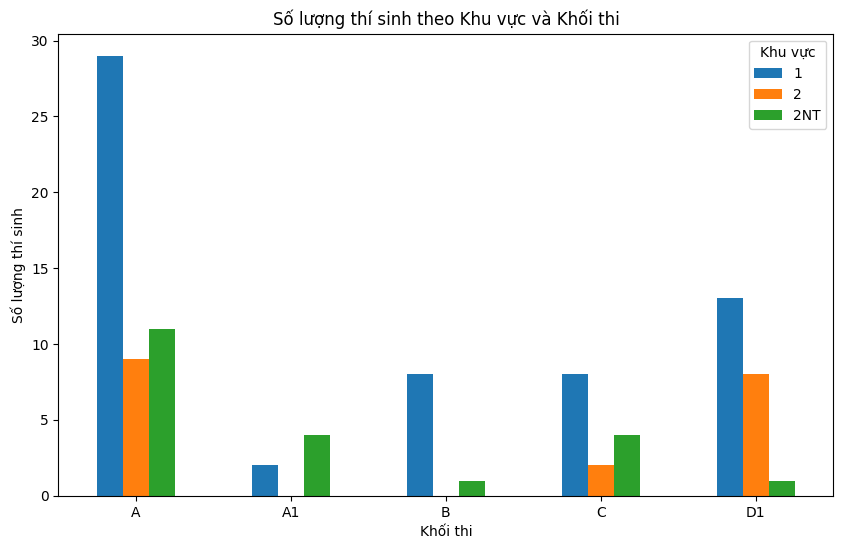

In [19]:
print("\n--- Trực quan dữ liệu số lượng thí sinh từng khu vực dựa trên từng nhóm khối thi ---")
kv_by_kt = df.groupby(['KT', 'KV']).size().unstack(fill_value=0)
kv_by_kt.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Số lượng thí sinh theo Khu vực và Khối thi')
plt.xlabel('Khối thi')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=0)
plt.legend(title='Khu vực')
plt.show()

4. Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi


--- Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi ---


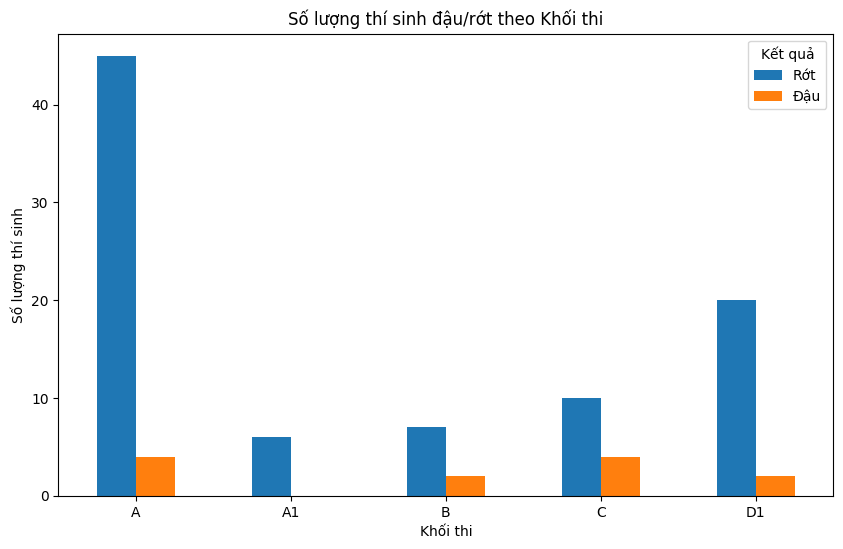

In [20]:
print("\n--- Trực quan dữ liệu số lượng thí sinh đậu, rớt trên từng nhóm khối thi ---")
kqxt_by_kt = df.groupby(['KT', 'KQXT']).size().unstack(fill_value=0)
kqxt_by_kt.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Số lượng thí sinh đậu/rớt theo Khối thi')
plt.xlabel('Khối thi')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=0)
plt.legend(title='Kết quả', labels=['Rớt', 'Đậu'])
plt.show()


5. Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực.


--- Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực ---


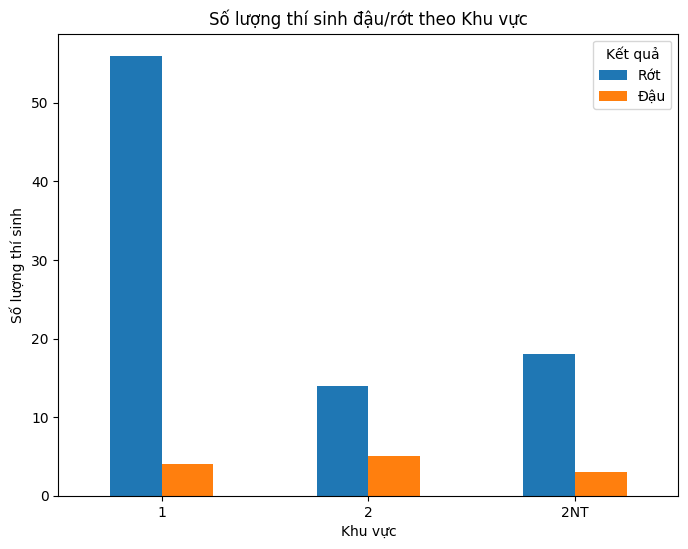

In [21]:
print("\n--- Trực quan dữ liệu số lượng thí sinh đậu rớt trên từng nhóm khu vực ---")
kqxt_by_kv = df.groupby(['KV', 'KQXT']).size().unstack(fill_value=0)
kqxt_by_kv.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.title('Số lượng thí sinh đậu/rớt theo Khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=0)
plt.legend(title='Kết quả', labels=['Rớt', 'Đậu'])
plt.show()

6. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc



--- Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc ---


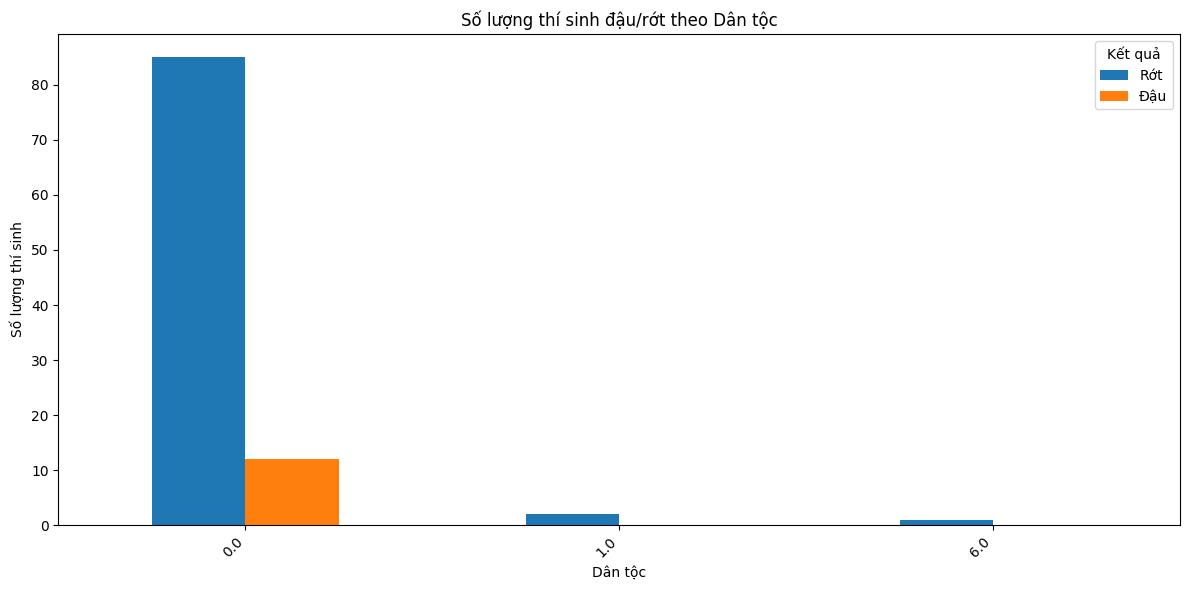

In [22]:
print("\n--- Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm dân tộc ---")
kqxt_by_dt = df.groupby(['DT', 'KQXT']).size().unstack(fill_value=0)
kqxt_by_dt.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Số lượng thí sinh đậu/rớt theo Dân tộc')
plt.xlabel('Dân tộc')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Kết quả', labels=['Rớt', 'Đậu'])
plt.tight_layout()
plt.show()

7. Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính.



--- Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính ---


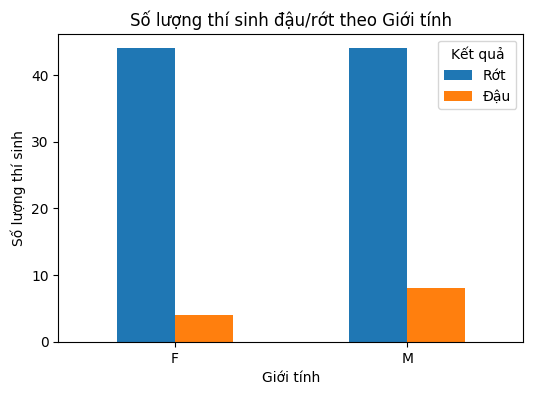

In [23]:
print("\n--- Trực quan dữ liệu số lượng thí sinh đậu rớt dựa trên từng nhóm giới tính ---")
kqxt_by_gt = df.groupby(['GT', 'KQXT']).size().unstack(fill_value=0)
kqxt_by_gt.plot(kind='bar', stacked=False, figsize=(6, 4))
plt.title('Số lượng thí sinh đậu/rớt theo Giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Số lượng thí sinh')
plt.xticks(rotation=0)
plt.legend(title='Kết quả', labels=['Rớt', 'Đậu'])
plt.show()

Phần 4: Trực quan hóa dữ liệu nâng cao

1. Vẽ biểu đồ đường Simple cho biến T1


--- Vẽ biểu đồ đường Simple cho biến T1 ---


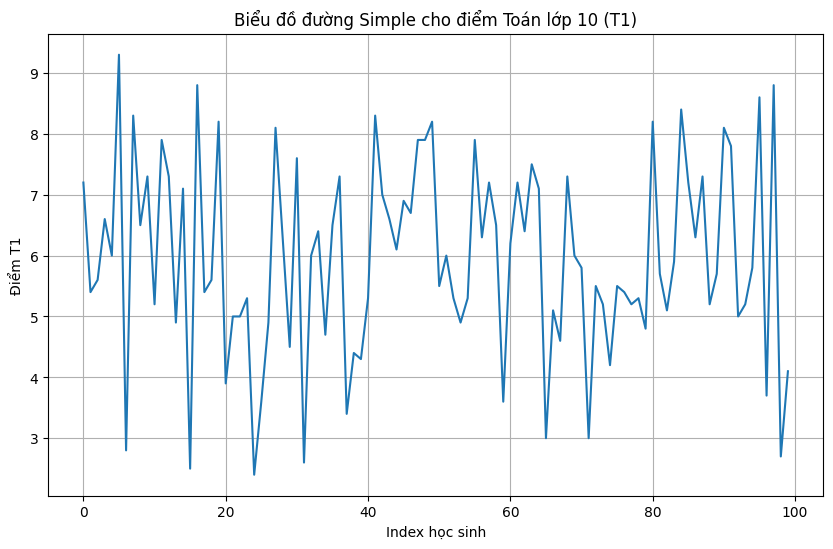

In [24]:
print("\n--- Vẽ biểu đồ đường Simple cho biến T1 ---")
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['T1'])
plt.title('Biểu đồ đường Simple cho điểm Toán lớp 10 (T1)')
plt.xlabel('Index học sinh')
plt.ylabel('Điểm T1')
plt.grid(True)
plt.show()

2. Hãy tạo biến phân loại (phanlopt1) cho môn toán (T1) như sau:

a. Từ 0 đến dưới 5 = kém (ký hiệu “k”)

b. Từ 5 đến dưới 7 = trung bình (ký hiệu “tb”)

c. Từ 7 đến dưới 8 = khá (ký hiệu “k”)

d. Từ 8 trở lên = giỏi (ký hiệu “g”)

In [25]:
def phan_loai_t1(diem):
    if diem < 5:
        return 'k'
    elif diem < 7:
        return 'tb'
    elif diem < 8:
        return 'ka'
    else:
        return 'g'

df['phanlopt1'] = df['T1'].apply(phan_loai_t1)
print("\nĐã tạo biến phân loại phanlopt1:")
print(df[['T1', 'phanlopt1']].head())



Đã tạo biến phân loại phanlopt1:
    T1 phanlopt1
0  7.2        ka
1  5.4        tb
2  5.6        tb
3  6.6        tb
4  6.0        tb


3. Lập bảng tần số cho biến phanloait1


In [26]:
print("\n--- Bảng tần số cho biến phanlopt1 ---")
phanlopt1_freq = df['phanlopt1'].value_counts().sort_index()
print(phanlopt1_freq)


--- Bảng tần số cho biến phanlopt1 ---
phanlopt1
g     12
k     23
ka    19
tb    46
Name: count, dtype: int64


4. Vẽ biểu đồ đường Multiple Line cho biến T1 được phân loại bởi biến phanlopt1


--- Vẽ biểu đồ đường Multiple Line cho biến T1 theo phanlopt1 ---


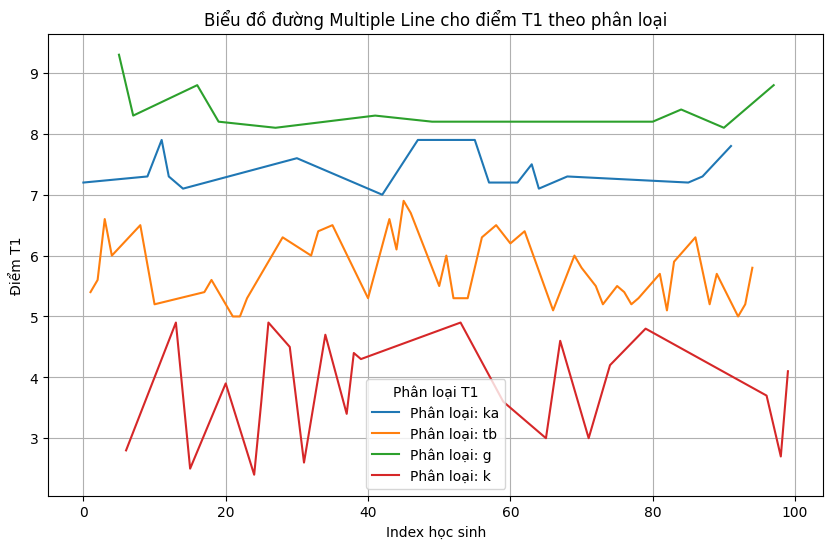

In [27]:
print("\n--- Vẽ biểu đồ đường Multiple Line cho biến T1 theo phanlopt1 ---")
plt.figure(figsize=(10, 6))
for phanlop in df['phanlopt1'].unique():
    subset = df[df['phanlopt1'] == phanlop]
    plt.plot(subset.index, subset['T1'], label=f'Phân loại: {phanlop}')
plt.title('Biểu đồ đường Multiple Line cho điểm T1 theo phân loại')
plt.xlabel('Index học sinh')
plt.ylabel('Điểm T1')
plt.legend(title='Phân loại T1')
plt.grid(True)
plt.show()

5. Vẽ biểu đồ Drop-line cho biến T1 được phân loại bởi biến phanlopt1


--- Vẽ biểu đồ Drop-line cho biến T1 theo phanlopt1 ---


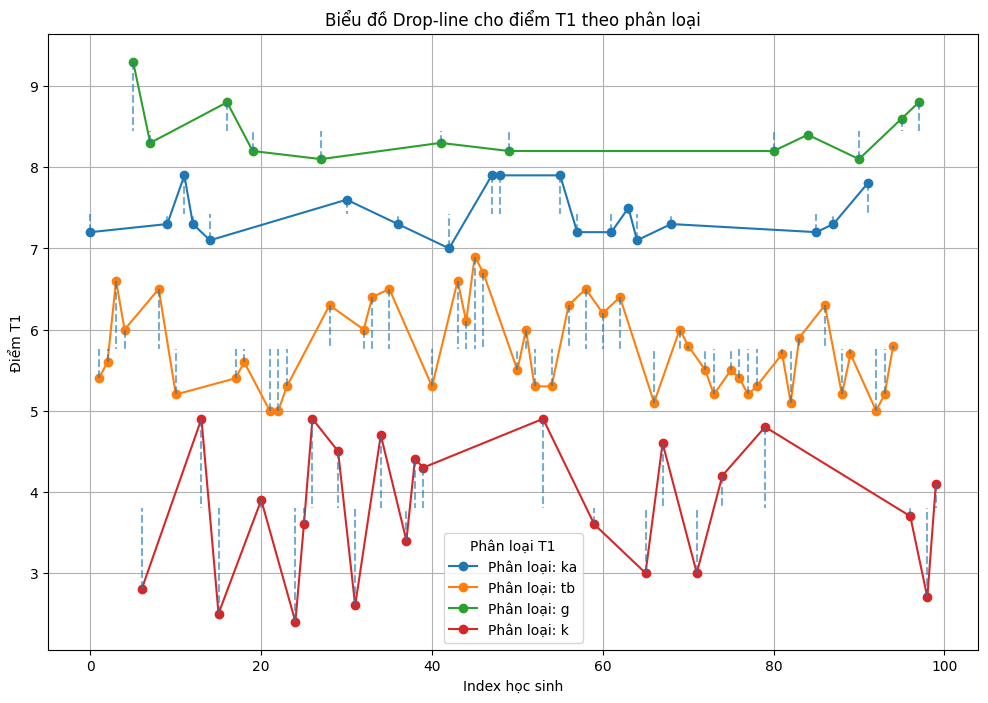

In [28]:
print("\n--- Vẽ biểu đồ Drop-line cho biến T1 theo phanlopt1 ---")
plt.figure(figsize=(12, 8))
for phanlop in df['phanlopt1'].unique():
    subset = df[df['phanlopt1'] == phanlop]
    plt.plot(subset.index, subset['T1'], marker='o', linestyle='-', label=f'Phân loại: {phanlop}')
    plt.vlines(subset.index, ymin=subset['T1'], ymax=subset['T1'].mean(), linestyles='dashed', alpha=0.6)
plt.title('Biểu đồ Drop-line cho điểm T1 theo phân loại')
plt.xlabel('Index học sinh')
plt.ylabel('Điểm T1')
plt.legend(title='Phân loại T1')
plt.grid(True)
plt.show()

Phần 5: Mô tả dữ liệu và khảo sát dạng phân phối

1. Hãy mô tả và khảo sát phân phối cho biến T1
Gợi ý
- Mô tả độ tập trung và phân tán của dữ liệu T1
- Vẽ biểu đồ Box-Plot và xác định các 10 đại lượng trong biểu đồ đó
- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm
- Vẽ biểu đồ Histogram biểu thị hình dáng phân phối
- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn
- Kiểm chứng phân phối chuẩn QQ-Plot
- Nhận xét và đánh giá về phân phối của T1


--- Mô tả và khảo sát phân phối cho biến T1 ---

- Mô tả độ tập trung và phân tán của dữ liệu T1:
count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64


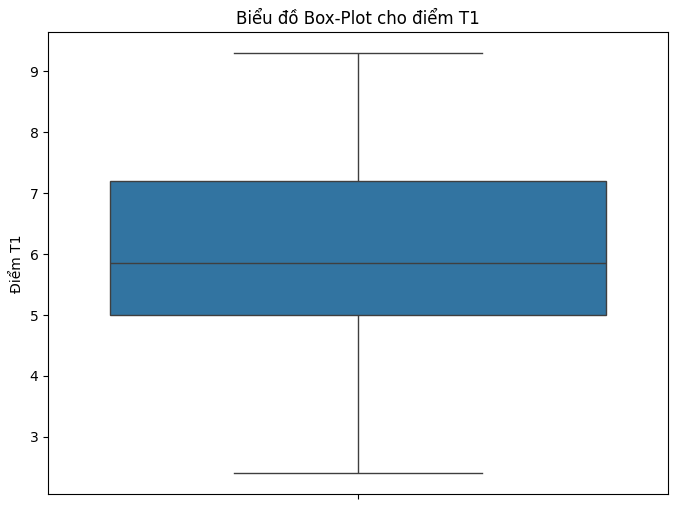


- Các đại lượng trong biểu đồ Box-Plot:
  Q1: 5.00
  Median (Q2): 5.85
  Q3: 7.20
  IQR: 2.20
  Upper Whisker: 9.30
  Lower Whisker: 2.40
  Số lượng outliers: 0

- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm:
  Mean: 5.95
  Median: 5.85
  Phân phối có xu hướng lệch phải (đuôi dài hơn về bên phải).


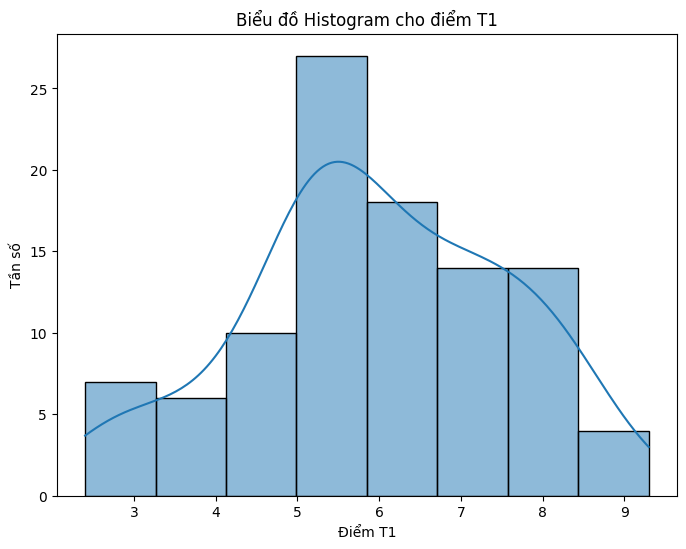


- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn:
  Skewness: -0.18
  Kurtosis: -0.48
  Phân phối lệch trái.
  Phân phối phẳng hơn phân phối chuẩn (platykurtic).


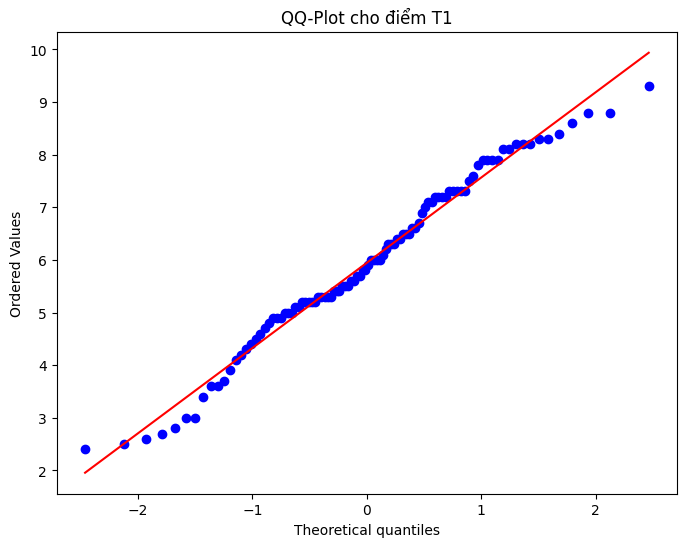


- Nhận xét và đánh giá về phân phối của T1:
  Dựa trên biểu đồ histogram và QQ-plot, có thể thấy phân phối của điểm T1...
  (Bạn cần tự đưa ra nhận xét cụ thể dựa trên hình dáng biểu đồ và độ lệch của các điểm so với đường thẳng trong QQ-plot).


In [29]:
print("\n--- Mô tả và khảo sát phân phối cho biến T1 ---")
print("\n- Mô tả độ tập trung và phân tán của dữ liệu T1:")
print(df['T1'].describe())

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['T1'])
plt.title('Biểu đồ Box-Plot cho điểm T1')
plt.ylabel('Điểm T1')
plt.show()
print("\n- Các đại lượng trong biểu đồ Box-Plot:")
q1 = df['T1'].quantile(0.25)
median = df['T1'].median()
q3 = df['T1'].quantile(0.75)
iqr = q3 - q1
upper_whisker = df['T1'][df['T1'] <= q3 + 1.5 * iqr].max()
lower_whisker = df['T1'][df['T1'] >= q1 - 1.5 * iqr].min()
outliers = df['T1'][(df['T1'] < q1 - 1.5 * iqr) | (df['T1'] > q3 + 1.5 * iqr)]
print(f"  Q1: {q1:.2f}")
print(f"  Median (Q2): {median:.2f}")
print(f"  Q3: {q3:.2f}")
print(f"  IQR: {iqr:.2f}")
print(f"  Upper Whisker: {upper_whisker:.2f}")
print(f"  Lower Whisker: {lower_whisker:.2f}")
print(f"  Số lượng outliers: {len(outliers)}")

print("\n- Mô tả hình dáng lệch của phân phối T1 dựa vào các đại lượng hướng tâm:")
mean_t1 = df['T1'].mean()
print(f"  Mean: {mean_t1:.2f}")
print(f"  Median: {median:.2f}")
if mean_t1 > median:
    print("  Phân phối có xu hướng lệch phải (đuôi dài hơn về bên phải).")
elif mean_t1 < median:
    print("  Phân phối có xu hướng lệch trái (đuôi dài hơn về bên trái).")
else:
    print("  Phân phối có xu hướng đối xứng.")

plt.figure(figsize=(8, 6))
sns.histplot(df['T1'], kde=True)
plt.title('Biểu đồ Histogram cho điểm T1')
plt.xlabel('Điểm T1')
plt.ylabel('Tần số')
plt.show()

print("\n- Mô tả các đặc trưng của phân phối, mức độ lệch và mức độ nhọn:")
skewness_t1 = df['T1'].skew()
kurtosis_t1 = df['T1'].kurt()
print(f"  Skewness: {skewness_t1:.2f}")
print(f"  Kurtosis: {kurtosis_t1:.2f}")
if skewness_t1 > 0:
    print("  Phân phối lệch phải.")
elif skewness_t1 < 0:
    print("  Phân phối lệch trái.")
else:
    print("  Phân phối gần đối xứng.")
if kurtosis_t1 > 0:
    print("  Phân phối nhọn hơn phân phối chuẩn (leptokurtic).")
elif kurtosis_t1 < 0:
    print("  Phân phối phẳng hơn phân phối chuẩn (platykurtic).")
else:
    print("  Phân phối có độ nhọn tương tự phân phối chuẩn (mesokurtic).")

plt.figure(figsize=(8, 6))
stats.probplot(df['T1'], plot=plt)
plt.title('QQ-Plot cho điểm T1')
plt.show()
print("\n- Nhận xét và đánh giá về phân phối của T1:")
print("  Dựa trên biểu đồ histogram và QQ-plot, có thể thấy phân phối của điểm T1...")
print("  (Bạn cần tự đưa ra nhận xét cụ thể dựa trên hình dáng biểu đồ và độ lệch của các điểm so với đường thẳng trong QQ-plot).")


2. Hãy mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phân lớp (phanlopT1)
Gợi ý
- Trực quan hóa biểu đồ Box-plot, histogram và QQ-plot theo phân nhóm là giá trị
của ‘phanlopT1’.


--- Mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phanlopt1 ---

Phân loại T1: ka
  Thống kê mô tả:
count    19.000000
mean      7.421053
std       0.311945
min       7.000000
25%       7.200000
50%       7.300000
75%       7.700000
max       7.900000
Name: T1, dtype: float64


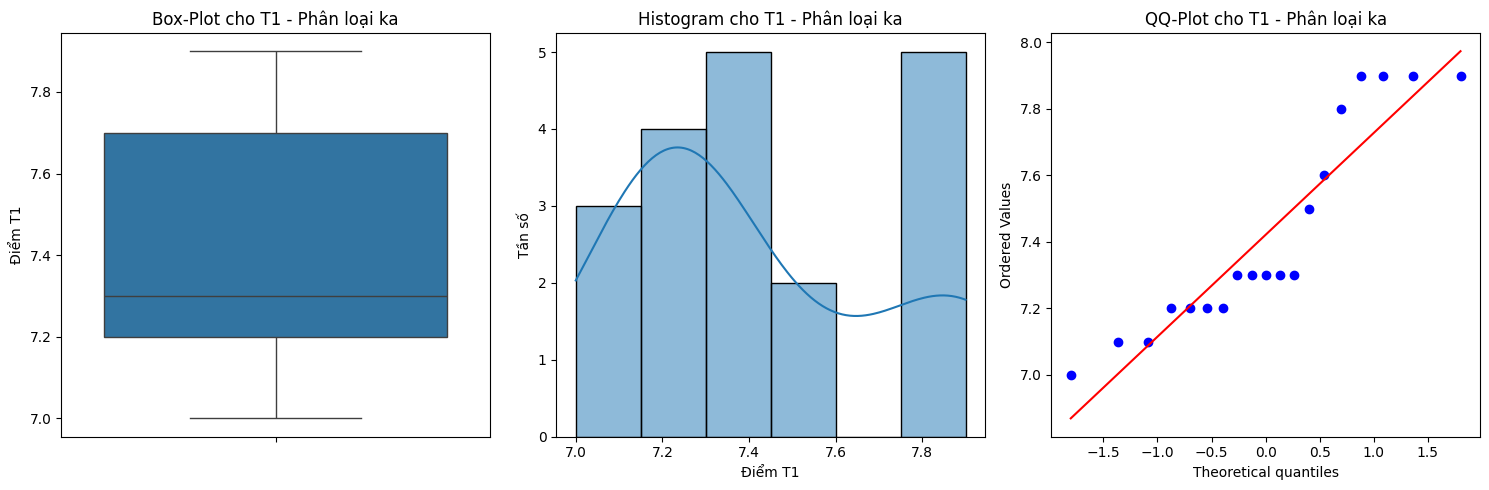


Phân loại T1: tb
  Thống kê mô tả:
count    46.000000
mean      5.756522
std       0.545141
min       5.000000
25%       5.300000
50%       5.650000
75%       6.275000
max       6.900000
Name: T1, dtype: float64


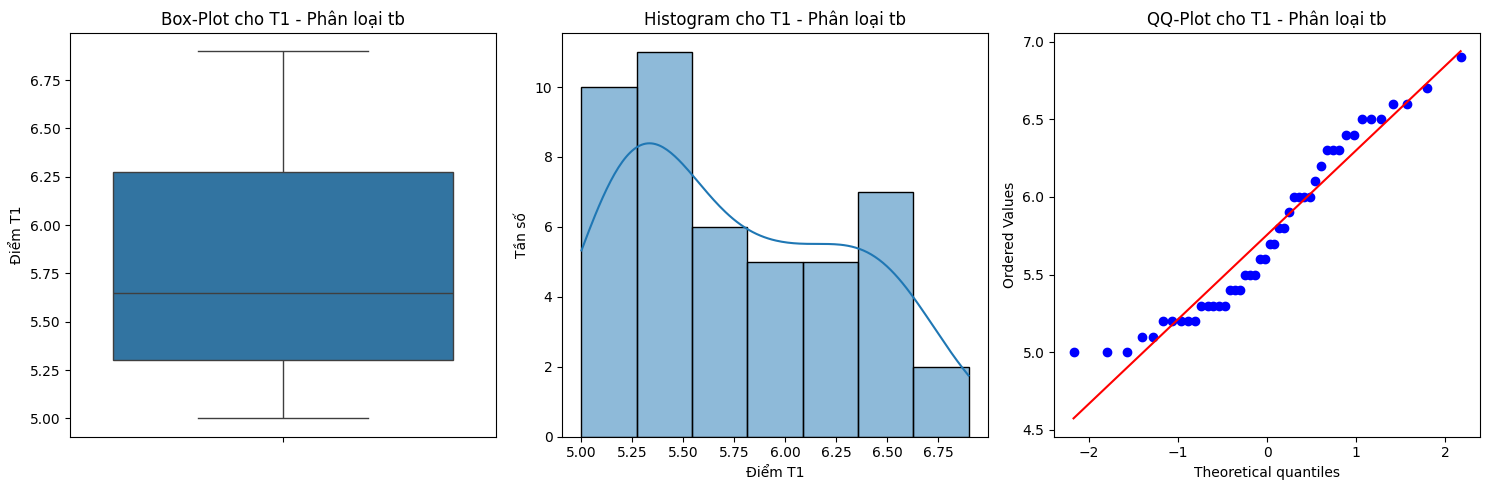


Phân loại T1: g
  Thống kê mô tả:
count    12.000000
mean      8.441667
std       0.365459
min       8.100000
25%       8.200000
50%       8.300000
75%       8.650000
max       9.300000
Name: T1, dtype: float64


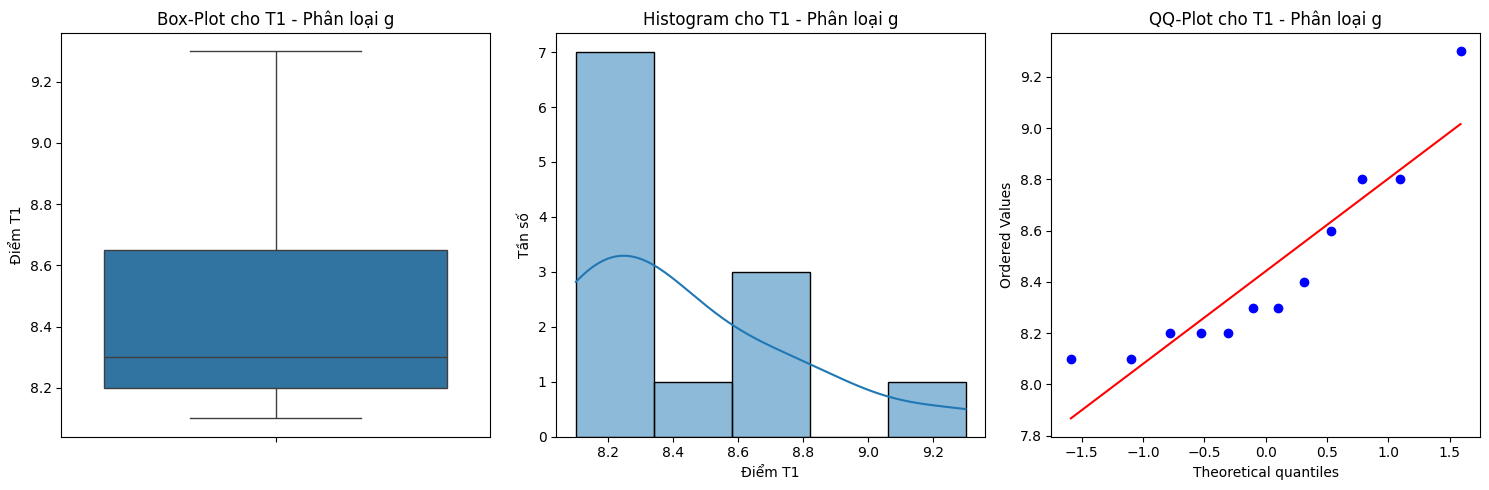


Phân loại T1: k
  Thống kê mô tả:
count    23.000000
mean      3.804348
std       0.859957
min       2.400000
25%       3.000000
50%       3.900000
75%       4.550000
max       4.900000
Name: T1, dtype: float64


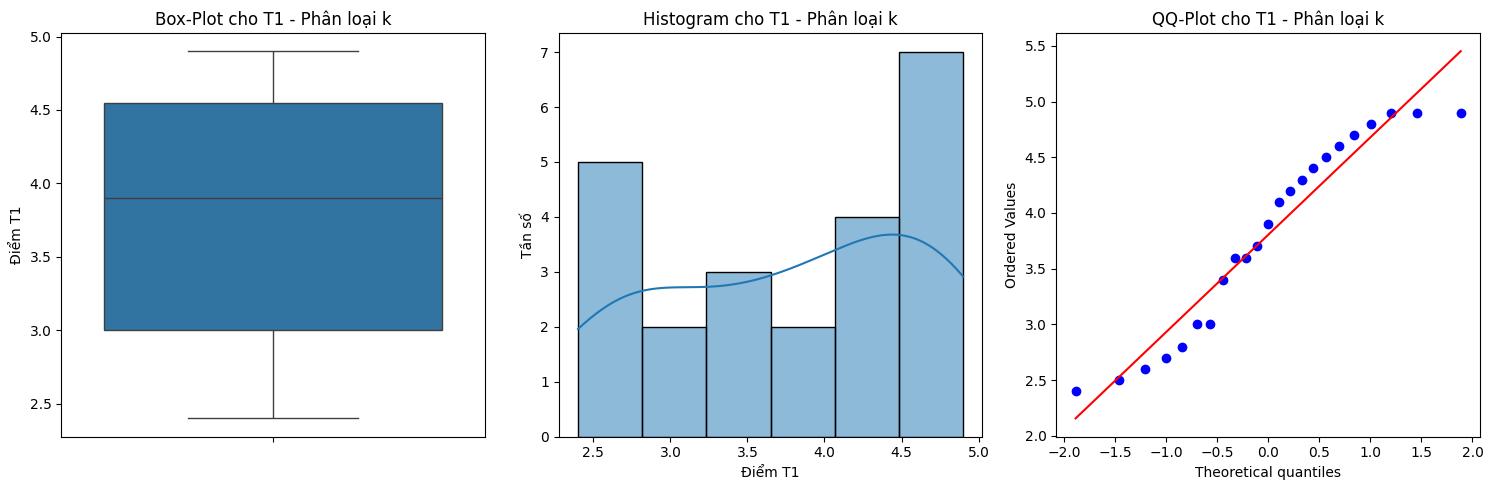

In [30]:
print("\n--- Mô tả và khảo sát phân phối cho biến T1 trên từng nhóm phanlopt1 ---")
for phanlop in df['phanlopt1'].unique():
    subset_t1 = df[df['phanlopt1'] == phanlop]['T1']
    print(f"\nPhân loại T1: {phanlop}")
    print(f"  Thống kê mô tả:")
    print(subset_t1.describe())

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(y=subset_t1)
    plt.title(f'Box-Plot cho T1 - Phân loại {phanlop}')
    plt.ylabel('Điểm T1')

    plt.subplot(1, 3, 2)
    sns.histplot(subset_t1, kde=True)
    plt.title(f'Histogram cho T1 - Phân loại {phanlop}')
    plt.xlabel('Điểm T1')
    plt.ylabel('Tần số')

    plt.subplot(1, 3, 3)
    stats.probplot(subset_t1, plot=plt)
    plt.title(f'QQ-Plot cho T1 - Phân loại {phanlop}')

    plt.tight_layout()
    plt.show()

3. Hãy khảo sát tương quan giữa biến DH1 theo biến T1
Gợi ý
- Nhận xét giá trị Covariance hoặc Correlation
- Vẽ biểu đồ Scatter thể hiện liên hệ của biến phụ thuộc DH1 theo biến độc lập T1


--- Khảo sát tương quan giữa biến DH1 và T1 ---
  Covariance giữa DH1 và T1: 0.11
  Correlation giữa DH1 và T1: 0.05
  Nhận xét: Giá trị correlation cho thấy mức độ và hướng tương quan tuyến tính giữa DH1 và T1.


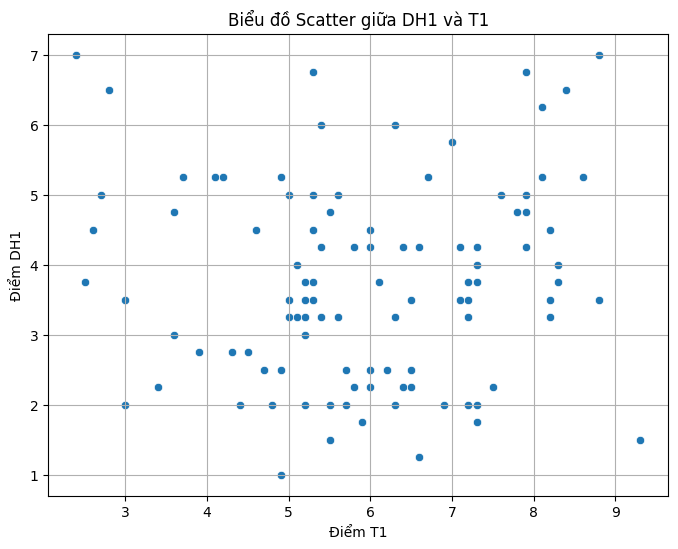

In [31]:
print("\n--- Khảo sát tương quan giữa biến DH1 và T1 ---")
covariance_dh1_t1 = df['DH1'].cov(df['T1'])
correlation_dh1_t1 = df['DH1'].corr(df['T1'])
print(f"  Covariance giữa DH1 và T1: {covariance_dh1_t1:.2f}")
print(f"  Correlation giữa DH1 và T1: {correlation_dh1_t1:.2f}")
print("  Nhận xét: Giá trị correlation cho thấy mức độ và hướng tương quan tuyến tính giữa DH1 và T1.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='T1', y='DH1', data=df)
plt.title('Biểu đồ Scatter giữa DH1 và T1')
plt.xlabel('Điểm T1')
plt.ylabel('Điểm DH1')
plt.grid(True)
plt.show()

4. Hãy khảo sát tương quan giữa biến DH1 theo biến T1 trên từng nhóm khu vực


--- Khảo sát tương quan giữa DH1 và T1 theo từng nhóm khu vực ---

Khu vực: 2NT
  Covariance giữa DH1 và T1: 0.51
  Correlation giữa DH1 và T1: 0.28


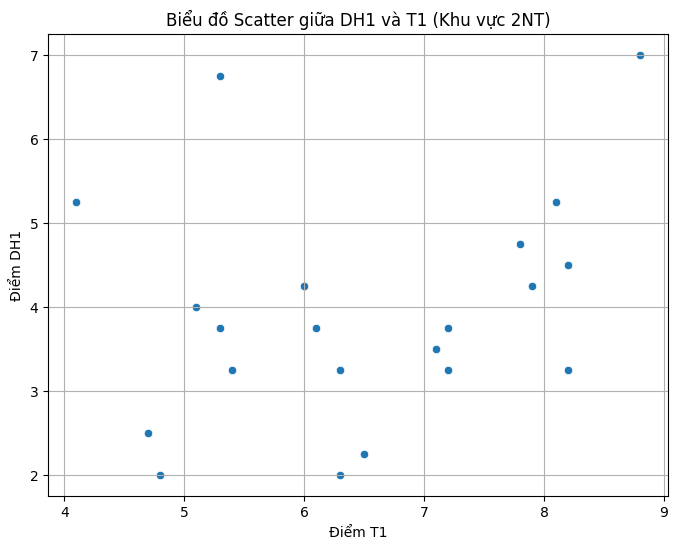


Khu vực: 1
  Covariance giữa DH1 và T1: -0.18
  Correlation giữa DH1 và T1: -0.08


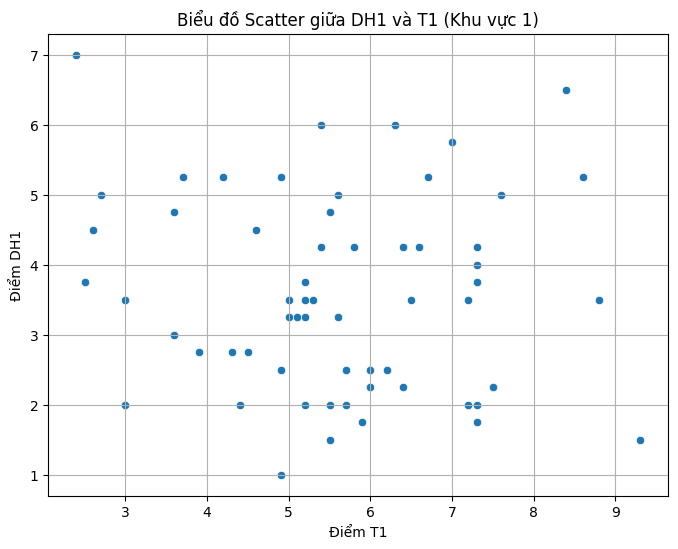


Khu vực: 2
  Covariance giữa DH1 và T1: 0.16
  Correlation giữa DH1 và T1: 0.06


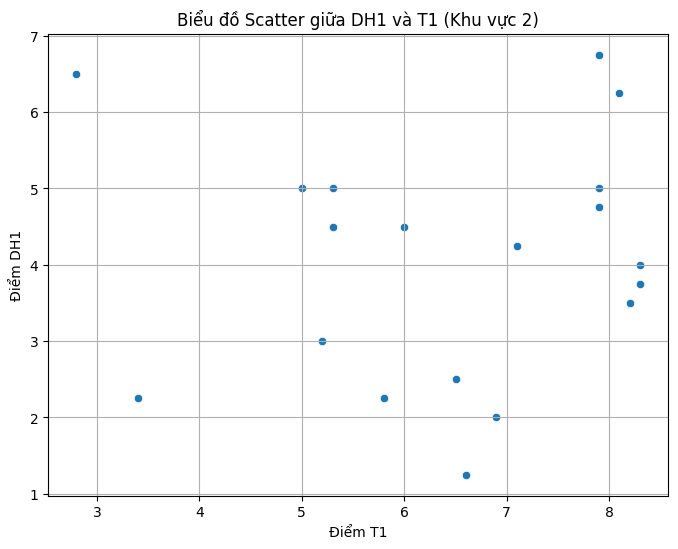

In [32]:
print("\n--- Khảo sát tương quan giữa DH1 và T1 theo từng nhóm khu vực ---")
for kv in df['KV'].unique():
    subset_kv = df[df['KV'] == kv]
    covariance_dh1_t1_kv = subset_kv['DH1'].cov(subset_kv['T1'])
    correlation_dh1_t1_kv = subset_kv['DH1'].corr(subset_kv['T1'])
    print(f"\nKhu vực: {kv}")
    print(f"  Covariance giữa DH1 và T1: {covariance_dh1_t1_kv:.2f}")
    print(f"  Correlation giữa DH1 và T1: {correlation_dh1_t1_kv:.2f}")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='T1', y='DH1', data=subset_kv)
    plt.title(f'Biểu đồ Scatter giữa DH1 và T1 (Khu vực {kv})')
    plt.xlabel('Điểm T1')
    plt.ylabel('Điểm DH1')
    plt.grid(True)
    plt.show()

5. Hãy khảo sát tương quan giữa các biến DH1, DH2, DH3
Gợi ý
- Nhận xét ma trận hiệp phương sai hoặc ma trận tương quan
- Vẽ biểu đồ Scatter giữa các biến



--- Khảo sát tương quan giữa các biến DH1, DH2, DH3 ---

Ma trận hiệp phương sai giữa DH1, DH2, DH3:
          DH1       DH2       DH3
DH1  2.028939  0.053081  0.027778
DH2  0.053081  1.123712 -0.101010
DH3  0.027778 -0.101010  1.083965

Ma trận tương quan giữa DH1, DH2, DH3:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000

Nhận xét: Xem xét các giá trị trong ma trận tương quan để đánh giá mối quan hệ tuyến tính giữa các biến.


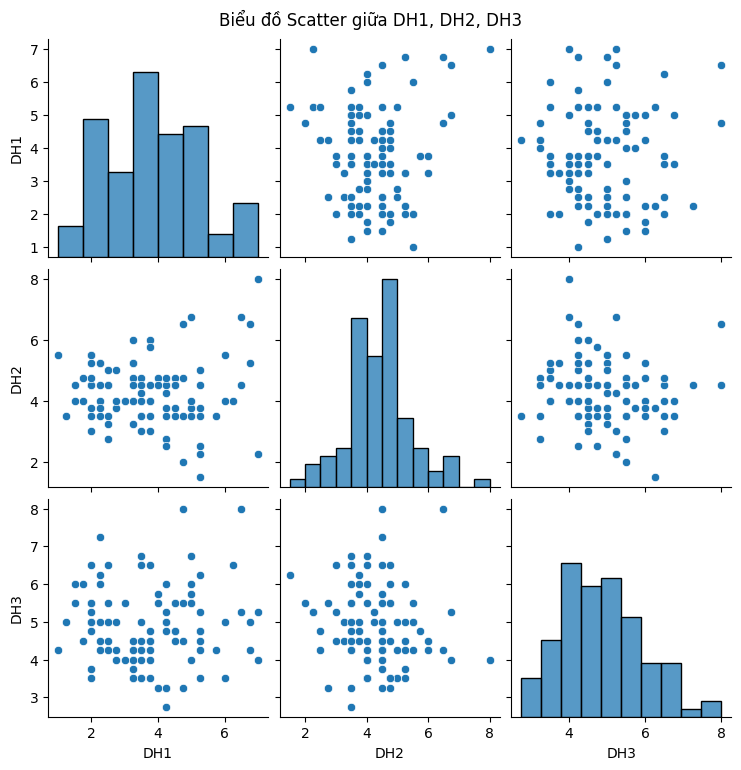

In [33]:
print("\n--- Khảo sát tương quan giữa các biến DH1, DH2, DH3 ---")
covariance_matrix_dh = df[['DH1', 'DH2', 'DH3']].cov()
correlation_matrix_dh = df[['DH1', 'DH2', 'DH3']].corr()
print("\nMa trận hiệp phương sai giữa DH1, DH2, DH3:")
print(covariance_matrix_dh)
print("\nMa trận tương quan giữa DH1, DH2, DH3:")
print(correlation_matrix_dh)
print("\nNhận xét: Xem xét các giá trị trong ma trận tương quan để đánh giá mối quan hệ tuyến tính giữa các biến.")

sns.pairplot(df[['DH1', 'DH2', 'DH3']])
plt.suptitle('Biểu đồ Scatter giữa DH1, DH2, DH3', y=1.02)
plt.show()